In [ ]:
batch_size = 60
epochs = 50
data_augmentation = True
initial_lrate = 0.0001

def decay(epoch, steps=100):
  initial_lrate = 0.0001
  drop = 0.96
  epochs_drop = 8
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

opt = Adam(lr=initial_lrate)
lr_sc = LearningRateScheduler(decay, verbose=1)
merged_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history= merged_model.fit([X_train_rgb, X_train_orb], y_train_rgb, validation_data=([X_test_rgb, X_test_orb], y_test_rgb), epochs=epochs, batch_size=batch_size, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/50
40/40 [==============================] - 19s 160ms/step - loss: 9.1305 - accuracy: 0.0954 - val_loss: 5.7954 - val_accuracy: 0.0800 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2/50
40/40 [==============================] - 5s 135ms/step - loss: 4.7130 - accuracy: 0.1079 - val_loss: 4.2136 - val_accuracy: 0.0900 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/50
40/40 [==============================] - 5s 128ms/step - loss: 3.6795 - accuracy: 0.1104 - val_loss: 3.5403 - val_accuracy: 0.1017 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/50
40/40 [==============================] - 6s 150ms/step - loss: 2.9000 - accuracy: 0.1629 - val_loss: 2.6046 - val_accuracy: 0.2050 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/50
40/40 [====================

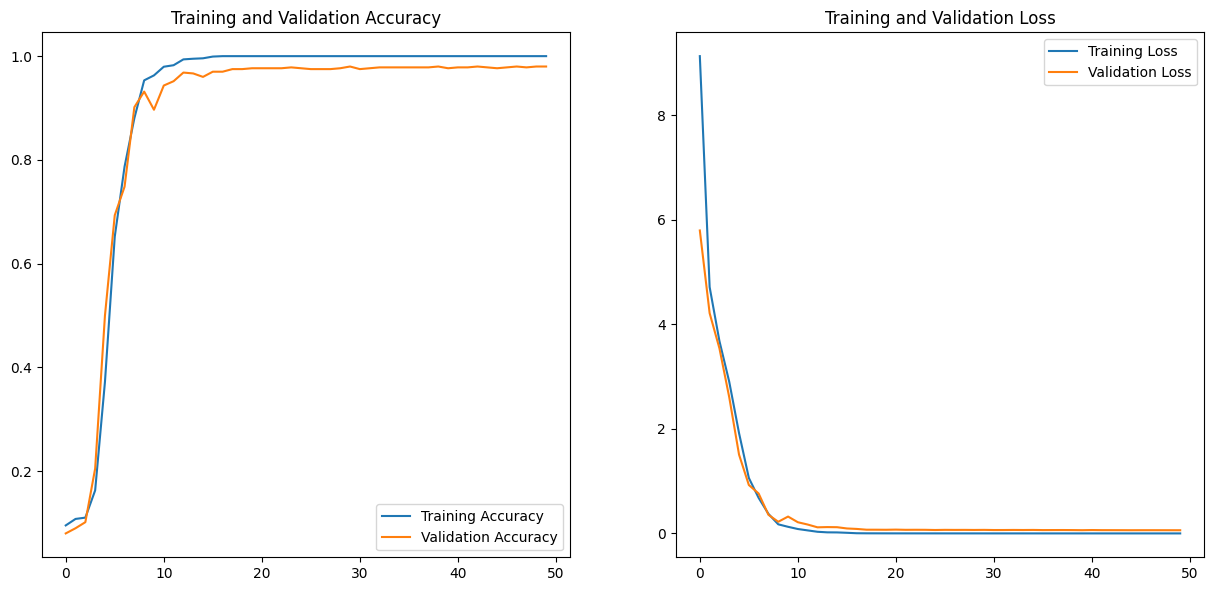

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50
                    )

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_x=merged_model.predict([X_test_rgb,X_test_orb])
classes_x=np.argmax(predictions_x,axis=1)

y_test_rgb=np.argmax(y_test_rgb,axis=1)

print(classification_report(y_test_rgb, classes_x, target_names = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']))

19/19 [==============================] - 2s 55ms/step
              precision    recall  f1-score   support

          C0       0.98      0.97      0.97        60
          C1       1.00      0.95      0.97        60
          C2       0.98      1.00      0.99        60
          C3       0.98      0.97      0.97        60
          C4       0.94      0.98      0.96        60
          C5       0.97      0.97      0.97        60
          C6       1.00      1.00      1.00        60
          C7       1.00      1.00      1.00        60
          C8       0.97      0.97      0.97        60
          C9       0.98      1.00      0.99        60

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
cm = confusion_matrix(y_test_rgb, classes_x)
cm

array([[58,  0,  0,  0,  0,  1,  0,  0,  1,  0],
       [ 1, 57,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 59,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 58,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 60]])

In [ ]:
# Mendapatkan nilai akurasi pelatihan dan pengujian (testing)
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Mencetak nilai akurasi pelatihan dan pengujian (testing)
print("Train Accuracy:", train_accuracy[-1])
print("Test Accuracy:", test_accuracy[-1])

Train Accuracy: 1.0
Test Accuracy: 0.9750000238418579
